$$
2 \left( \frac{4}{1.2 \cdot \sqrt{2 \pi}} \cdot e^{-\frac{1}{2} \left(\frac{x - 11}{1.2}\right)^2} + \frac{7}{2.4 \cdot \sqrt{2 \pi}} \cdot e^{-\frac{1}{2} \left(\frac{x - 15}{2.4}\right)^2} \right)
$$


### Крок 1: Візуалізація функції на відрізку від 0 до 24 годин

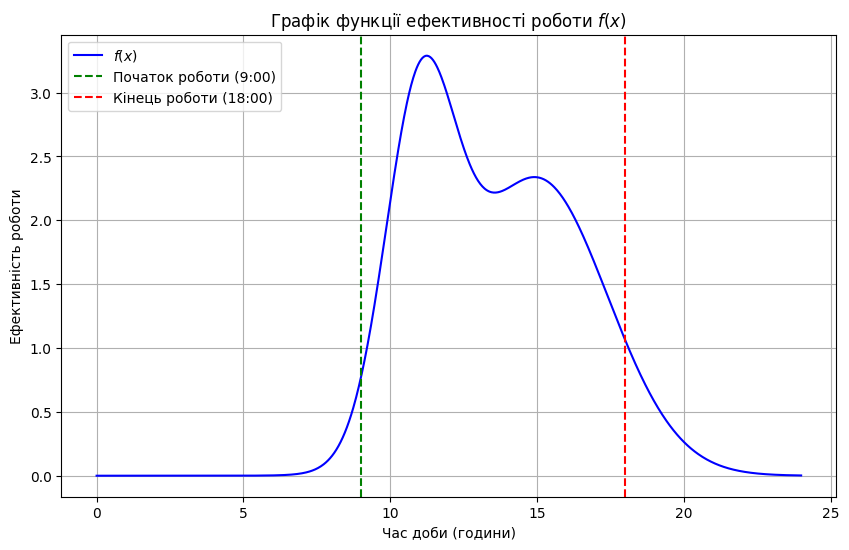

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Визначення змінної
x = sp.symbols('x')

# Визначення функції
f = 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) +
         7 / (2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4)**2))

# Перетворення функції на lambdify для обчислень
f_lambdified = sp.lambdify(x, f, "numpy")

# Генеруємо значення для графіку
x_vals = np.linspace(0, 24, 1000)
f_vals = f_lambdified(x_vals)

# Створюємо графік
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='$f(x)$', color='blue')
plt.axvline(9, color='green', linestyle='--', label='Початок роботи (9:00)')
plt.axvline(18, color='red', linestyle='--', label='Кінець роботи (18:00)')
plt.title('Графік функції ефективності роботи $f(x)$')
plt.xlabel('Час доби (години)')
plt.ylabel('Ефективність роботи')
plt.grid(True)
plt.legend()
plt.show()

### Крок 2: Обчислення невизначеного інтегралу

In [16]:
# Обчислення невизначеного інтегралу
indefinite_integral = sp.integrate(f, x)
print("Невизначений інтеграл функції:")
display(indefinite_integral)

Невизначений інтеграл функції:


4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

#### Коментар до результату

Отриманий результат є невизначеним інтегралом заданої функції. Він містить дві основні частини, кожна з яких включає *функцію помилок (erf)*

##### **Функція `erf`**

[Функція помилки](https://uk.wikipedia.org/wiki/Функція_помилок), позначена як `erf(x)`, є спеціальною математичною функцією, яка використовується в теорії ймовірностей та статистиці. Вона визначена як:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
$$

Це інтеграл від гауссової функції, нормалізований так, щоб erf(∞) = 1.


###### **Властивості**

- Функція erf є непарною функцією: erf(-x) = -erf(x)
- Значення erf(x) змінюються від -1 до 1 при x від -∞ до +∞
- При x = 0, erf(0) = 0
- Функція швидко наближається до ±1 при збільшенні |x|

###### **Застосування**

Функція помилок має широке застосування:

- **Теорія ймовірностей**: Використовується для обчислення кумулятивної функції розподілу нормального розподілу.
- **Теплопровідність**: Застосовується при розв'язанні рівнянь теплопровідності.
- **Обробка сигналів**: Використовується при аналізі сигналів та фільтрації.

###### **Обчислення**

Точне обчислення erf(x) вимагає чисельних методів, оскільки функція не має елементарного виразу. Існують різні методи апроксимації, включаючи розклад у [ряд Тейлора](https://uk.wikipedia.org/wiki/Ряд_Тейлора) та продовжені дроби.

###### **Результат**

Функція помилок є фундаментальною в багатьох галузях математики та фізики, забезпечуючи зв'язок між алгебраїчними та інтегральними операціями.

Наявність функції помилок у результаті інтегрування є *очікуваною*, оскільки вихідна функція містила експоненціальні члени, характерні для нормального розподілу.


#### Додаткова візуалізація

Відобразимо графік первісної функції (інтегралу) поряд з графіком вихідної функції для візуального порівняння.

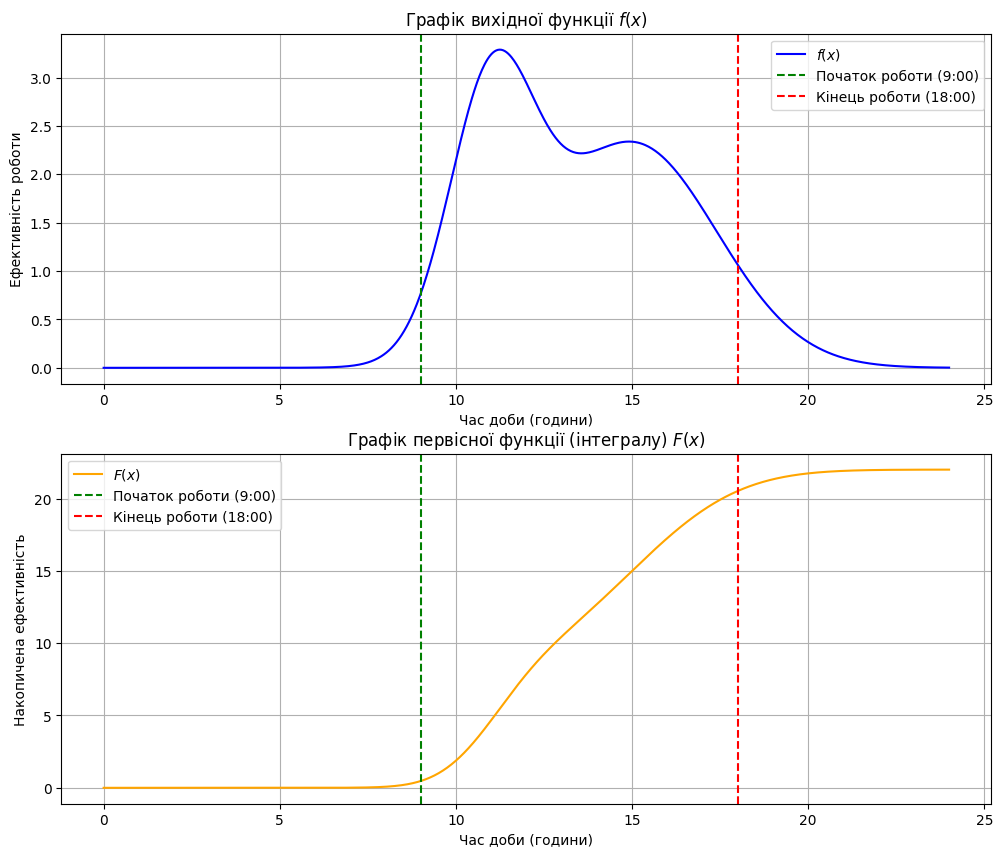

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
from scipy import integrate

# Функція для обчислення інтегралу
def F(x_val):
    return integrate.quad(f_lambdified, 0, x_val)[0]

# Генеруємо значення для графіку
F_vals = np.array([F(x) for x in x_vals])

# Створюємо графік
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Графік вихідної функції
plt.figure(figsize=(10, 6))
ax1.plot(x_vals, f_vals, label="$f(x)$", color="blue")
ax1.axvline(9, color="green", linestyle="--", label="Початок роботи (9:00)")
ax1.axvline(18, color="red", linestyle="--", label="Кінець роботи (18:00)")
ax1.set_title("Графік вихідної функції $f(x)$")
ax1.set_xlabel("Час доби (години)")
ax1.set_ylabel("Ефективність роботи")
ax1.grid(True)
ax1.legend()

# Графік первісної функції (інтегралу)
plt.figure(figsize=(10, 6))
ax2.plot(x_vals, F_vals, label="$F(x)$", color="orange")
ax2.axvline(9, color="green", linestyle="--", label="Початок роботи (9:00)")
ax2.axvline(18, color="red", linestyle="--", label="Кінець роботи (18:00)")
ax2.set_title("Графік первісної функції (інтегралу) $F(x)$")
ax2.set_xlabel("Час доби (години)")
ax2.set_ylabel("Накопичена ефективність")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [18]:
### Крок 4: Обчислення визначеного інтегралу на відрізку від 9 до 18

In [19]:
# Обчислення визначеного інтегралу
a = 9
b = 18
definite_integral = sp.integrate(f, (x, a, b))

print(f"Визначений інтеграл функції від {a} до {b} (середня кількість тасків за робочий день):")
display(definite_integral)

Визначений інтеграл функції від 9 до 18 (середня кількість тасків за робочий день):


14.178654163478*sqrt(2)

In [20]:
# Обчислення числового значення
numerical_result = float(definite_integral.evalf())
print(f"Числове значення інтегралу: {numerical_result:.2f}")

# Відсоткове представлення
max_efficiency = float(sp.integrate(f, (x, 0, 24)).evalf())
percentage = (numerical_result / max_efficiency) * 100
print(f"Відсоток від максимальної ефективності: {percentage:.2f}%")


Числове значення інтегралу: 20.05
Відсоток від максимальної ефективності: 91.15%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Визначення змінної та функції
x = sp.symbols('x')
f = 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) +
         7 / (2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4)**2))

# Обчислення невизначеного інтегралу
F = sp.integrate(f, x)

# Перетворення функцій на lambdify для обчислень
f_lambdified = sp.lambdify(x, f, "numpy")
F_lambdified = sp.lambdify(x, F, "numpy")

# Генеруємо значення для графіку
x_vals = np.linspace(0, 24, 1000)
f_vals = f_lambdified(x_vals)
F_vals = F_lambdified(x_vals)

# Створюємо графік
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Графік вихідної функції
ax1.plot(x_vals, f_vals, label='$f(x)$', color='blue')
ax1.axvline(9, color='green', linestyle='--', label='Початок роботи (9:00)')
ax1.axvline(18, color='red', linestyle='--', label='Кінець роботи (18:00)')
ax1.set_title('Графік вихідної функції $f(x)$')
ax1.set_xlabel('Час доби (години)')
ax1.set_ylabel('Ефективність роботи')
ax1.grid(True)
ax1.legend()

# Графік первісної функції (інтегралу)
ax2.plot(x_vals, F_vals, label='$F(x)$', color='orange')
ax2.axvline(9, color='green', linestyle='--', label='Початок роботи (9:00)')
ax2.axvline(18, color='red', linestyle='--', label='Кінець роботи (18:00)')
ax2.set_title('Графік первісної функції (інтегралу) $F(x)$')
ax2.set_xlabel('Час доби (години)')
ax2.set_ylabel('Накопичена ефективність')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Обчислення визначеного інтегралу
a, b = 9, 18
definite_integral = float(sp.integrate(f, (x, a, b)).evalf())
print(f"Визначений інтеграл функції від {a} до {b} (середня кількість тасків за робочий день): {definite_integral:.2f}")


TypeError: only length-1 arrays can be converted to Python scalars